**Target:**

    -- Our previous model has 6.3M parameters. I want to reduce these parameters here. I want to make them < 10K

**Results:**

    -- Parameters: 9,916
    -- Best Training Accuracy: 99.53
    -- Best Test Accuracy: 99.36


**Analysis:**

    -- The accuracy has dropped a little (from 99.56 to 99.36) after reducing the number of parameters
    -- training and test accuracy are increasing with epochs. So we are in the right path. We might improve results by training it for few more epochs. We will keep number of epochs to 15 and increase it if required in future

#**Import libraries**

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#**Data Transformations (without normalization)** 

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])


# **Dataset and Creating Train/Test Split (without normalization)**

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Dataloader Arguments & Test/Train Dataloaders (without normalization)**


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#**Getting data statistics (without normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)
torch.Size([128, 1, 28, 28])
torch.Size([128])


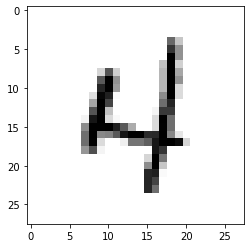

In [5]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

#**Data Transformations (with normalization)**

In [6]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])


# **Dataset and Creating Train/Test Split (with normalization)**

In [7]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# **Dataloader Arguments & Test/Train Dataloaders (with normalization)**


In [8]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


#**Getting data statistics (with normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


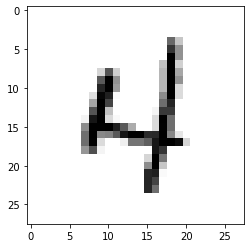

In [9]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

**Model**

In [28]:
dropout_rate = 0.05
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #input block
    self.convblock1 = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(10),
                                    nn.ReLU()) #R_in = 1, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  1+ (3-1)*1 = 3, C_out = 28
    
    #conv block 1
    self.convblock2 = nn.Sequential(nn.Conv2d(in_channels = 10, out_channels = 14, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(14),
                                    nn.ReLU()) #R_in = 3, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  3+ (3-1)*1 = 5, , C_out = 28
    
    #conv block 2
    self.convblock3 = nn.Sequential(nn.Conv2d(in_channels = 14, out_channels = 16, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(16),
                                    nn.ReLU()) #R_in = 5, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  5+ (3-1)*1 = 7, , C_out = 28
    
    #transition block1
    self.convblock4 = nn.Sequential(nn.Conv2d(in_channels = 16, out_channels = 14, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(14),
                                    nn.ReLU()) #R_in = 7, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  7+ (3-1)*1 = 9, , C_out = 28

    self.pool1 = nn.MaxPool2d(2, 2) #R_in = 9, C_in = 28, K = 2, P = 0, S = 2, J_in = 1, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (2-1)*1 = 9, , C_out = 14

    #conv block 3
    self.convblock5 = nn.Sequential(nn.Conv2d(in_channels = 14, out_channels = 12, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(12),
                                    nn.ReLU()) #R_in = 9, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (3-1)*2 = 13, , C_out = 14
    
    #conv block 4
    self.convblock6 = nn.Sequential(nn.Conv2d(in_channels = 12, out_channels = 14, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(14),
                                    nn.ReLU()) #R_in = 13, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  13+ (3-1)*2 = 17, , C_out = 14
    #gap layer 
    self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4))  #R_in = 17, C_in = 14, K = 4, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  17+ (4-1)*2 = 23, , C_out = 14

    #output block
    self.convblock7 = nn.Sequential(nn.Conv2d(in_channels = 14, out_channels = 10, kernel_size = 3, padding = 0)) #R_in = 23, C_in = 14, K = 3, P = 0, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  23+ (3-1)*2 = 27, , C_out = 12

  def forward(self, x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.convblock3(x)
    x = self.convblock4(x)
    x = self.pool1(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.gap(x)
    x = self.convblock7(x)
    x = x.view(-1, 10)
    return F.log_softmax(x, dim=-1)

**Model parameters**

In [29]:
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
summary(model, input_size = (1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
            Conv2d-4           [-1, 14, 28, 28]           1,274
       BatchNorm2d-5           [-1, 14, 28, 28]              28
              ReLU-6           [-1, 14, 28, 28]               0
            Conv2d-7           [-1, 16, 28, 28]           2,032
       BatchNorm2d-8           [-1, 16, 28, 28]              32
              ReLU-9           [-1, 16, 28, 28]               0
           Conv2d-10           [-1, 14, 28, 28]           2,030
      BatchNorm2d-11           [-1, 14, 28, 28]              28
             ReLU-12           [-1, 14, 28, 28]               0
    

**Training and Testing**

In [30]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [31]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=0.059505537152290344 Batch_id=468 Accuracy=92.30: 100%|██████████| 469/469 [00:20<00:00, 23.30it/s]



Test set: Average loss: 0.0690, Accuracy: 9786/10000 (97.86%)

EPOCH: 1


Loss=0.11603377014398575 Batch_id=468 Accuracy=98.17: 100%|██████████| 469/469 [00:15<00:00, 30.74it/s]



Test set: Average loss: 0.1156, Accuracy: 9654/10000 (96.54%)

EPOCH: 2


Loss=0.05809774994850159 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:14<00:00, 31.56it/s]



Test set: Average loss: 0.0431, Accuracy: 9871/10000 (98.71%)

EPOCH: 3


Loss=0.08395007252693176 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:14<00:00, 31.61it/s]



Test set: Average loss: 0.0347, Accuracy: 9888/10000 (98.88%)

EPOCH: 4


Loss=0.029559889808297157 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:14<00:00, 31.76it/s]



Test set: Average loss: 0.0333, Accuracy: 9891/10000 (98.91%)

EPOCH: 5


Loss=0.01610000990331173 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:15<00:00, 30.93it/s]



Test set: Average loss: 0.0320, Accuracy: 9889/10000 (98.89%)

EPOCH: 6


Loss=0.027190232649445534 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:15<00:00, 29.83it/s]



Test set: Average loss: 0.0582, Accuracy: 9811/10000 (98.11%)

EPOCH: 7


Loss=0.02244214527308941 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:15<00:00, 31.27it/s]



Test set: Average loss: 0.0271, Accuracy: 9908/10000 (99.08%)

EPOCH: 8


Loss=0.013607493601739407 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:14<00:00, 31.43it/s]



Test set: Average loss: 0.0229, Accuracy: 9927/10000 (99.27%)

EPOCH: 9


Loss=0.005332443863153458 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:16<00:00, 28.95it/s]



Test set: Average loss: 0.0290, Accuracy: 9904/10000 (99.04%)

EPOCH: 10


Loss=0.02520093135535717 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:15<00:00, 31.08it/s]



Test set: Average loss: 0.0257, Accuracy: 9921/10000 (99.21%)

EPOCH: 11


Loss=0.01890501007437706 Batch_id=468 Accuracy=99.43: 100%|██████████| 469/469 [00:14<00:00, 31.28it/s]



Test set: Average loss: 0.0203, Accuracy: 9929/10000 (99.29%)

EPOCH: 12


Loss=0.011979999952018261 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [00:14<00:00, 31.36it/s]



Test set: Average loss: 0.0223, Accuracy: 9929/10000 (99.29%)

EPOCH: 13


Loss=0.014297780580818653 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:14<00:00, 31.30it/s]



Test set: Average loss: 0.0199, Accuracy: 9936/10000 (99.36%)

EPOCH: 14


Loss=0.012403388507664204 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:15<00:00, 31.19it/s]



Test set: Average loss: 0.0237, Accuracy: 9926/10000 (99.26%)



Text(0.5, 1.0, 'Test Accuracy')

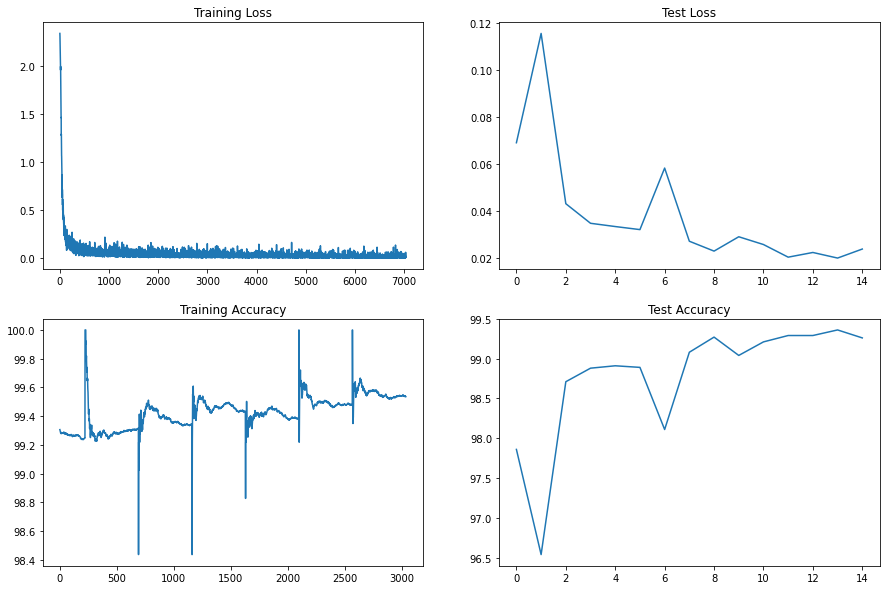

In [32]:
train_losses = [i.item() for i in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")